<a href="https://colab.research.google.com/github/Abir196/Wasteless/blob/main/Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

In [3]:
import pandas as pd
import pycaret

In [24]:
pip install m2cgen


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 99 kB/s 


In [ ]:
pip install numba --upgrade

In [7]:
data = pd.read_csv("ma_data.csv")
data = data.drop("Unnamed: 0",axis=1)
data

,LCLid,energy(kWh/hh),temperature,year,month,day,hour
0,246,0.149,11.00,2011,12,3,9
1,246,0.768,11.42,2011,12,3,10
2,246,0.588,11.41,2011,12,3,11
3,246,0.843,11.33,2011,12,3,12
4,246,0.120,11.41,2011,12,3,13
...,...,...,...,...,...,...,...
61140,3874,0.151,9.74,2012,10,26,0
61141,3668,0.262,9.74,2012,10,26,0
61142,4179,1.660,9.74,2012,10,26,0
61143,4247,0.171,9.74,2012,10,26,0


In [9]:
len(list(data["LCLid"].unique()))

49

In [10]:
eta = 0.2
df_model = data.iloc[:int(data.shape[0]*(1-eta))]
df_real = data.iloc[int(data.shape[0]*(1-eta)):]
df_model.shape

(48916, 7)

In [11]:
df_model1 = df_model.iloc[:int(df_model.shape[0]*0.75)]

In [18]:
from pycaret.regression import *
exp_name = setup(data = df_model1,  target = 'energy(kWh/hh)',feature_selection = True,categorical_features = ["LCLid","year","month","day","hour"],numeric_features=["temperature"]) 

comp_model = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1863,0.0974,0.3119,0.7548,0.1549,0.6616,0.216
rf,Random Forest Regressor,0.1787,0.1019,0.3189,0.7437,0.1591,0.5535,14.799
gbr,Gradient Boosting Regressor,0.2064,0.1096,0.3308,0.7243,0.1656,0.7964,2.334
et,Extra Trees Regressor,0.1887,0.1213,0.3481,0.6946,0.1745,0.5253,17.372
ridge,Ridge Regression,0.2267,0.1224,0.3496,0.6920,0.1764,0.8954,0.030
br,Bayesian Ridge,0.2266,0.1224,0.3496,0.6920,0.1764,0.8954,0.135
lr,Linear Regression,0.2279,0.1230,0.3505,0.6903,0.1771,0.9035,0.288
omp,Orthogonal Matching Pursuit,0.2315,0.1319,0.3629,0.6681,0.1818,0.8238,0.031
huber,Huber Regressor,0.2013,0.1378,0.3708,0.6535,0.1806,0.5073,1.179
dt,Decision Tree Regressor,0.2237,0.1716,0.4140,0.5680,0.2046,0.6369,0.255


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1125, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [26]:
from pycaret.regression import *
exp_name = setup(data = df_model1,  target = 'energy(kWh/hh)',feature_selection = True,categorical_features = ["LCLid","year","month","day","hour"],numeric_features=["temperature"]) 
ridge_reg = create_model('ridge')
tune_model(ridge_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2266,0.1229,0.3505,0.6946,0.1771,0.9718
1,0.2238,0.1221,0.3494,0.6851,0.1773,0.9174
2,0.2215,0.1143,0.3381,0.6962,0.1748,0.9425
3,0.2313,0.1297,0.3601,0.6937,0.1793,0.8693
4,0.2317,0.1319,0.3632,0.6751,0.1813,0.8483
5,0.2187,0.1124,0.3352,0.7038,0.1707,0.8936
6,0.2248,0.1160,0.3406,0.6960,0.1759,0.9210
7,0.2090,0.1038,0.3222,0.7297,0.1654,0.8591
8,0.2244,0.1153,0.3396,0.6972,0.1754,0.8983


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:Ridge(alpha=2.85, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7822, solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


Ridge(alpha=2.85, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7822, solver='auto', tol=0.001)

In [ ]:
from pycaret.regression import *
exp_name = setup(data = df_model1,  target = 'energy(kWh/hh)') 
linear_reg = create_model('lr')
tune_model(linear_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2328,0.1326,0.3642,0.6754,0.1826,0.9176
1,0.2180,0.1107,0.3327,0.7097,0.1722,0.8513
2,0.2348,0.1291,0.3593,0.6617,0.1845,0.8735
3,0.2241,0.1169,0.3419,0.6954,0.1755,0.9302
4,0.2194,0.1169,0.3420,0.6916,0.1731,0.8880
5,0.2209,0.1177,0.3430,0.6922,0.1756,0.8391
6,0.2260,0.1231,0.3508,0.7034,0.1752,0.8879
7,0.2318,0.1315,0.3627,0.6786,0.1803,0.9116
8,0.2278,0.1235,0.3515,0.6842,0.1793,0.8791


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)
INFO:logs:tune_model() succesfully completed......................................


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)

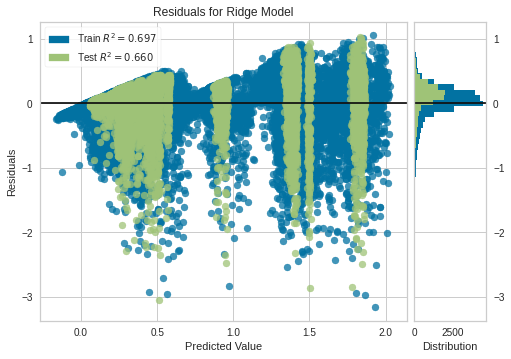

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(ridge_reg)

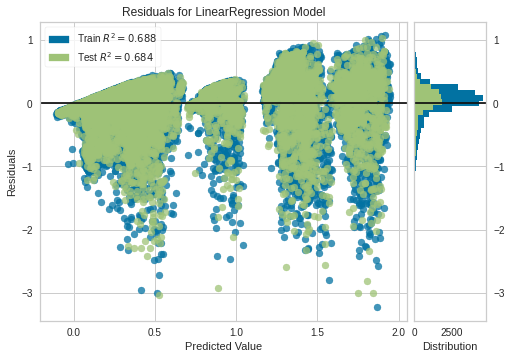

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(linear_reg)

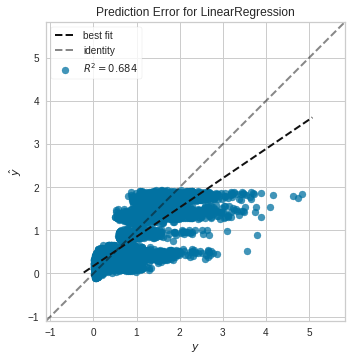

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(linear_reg, plot = 'error')

In [25]:
lr_java = convert_model(ridge_reg, language = 'javascript')
print(lr_java)

function score(input) {
    var var0;
    if (input[39] > 0.000000000000000000000000000000000010000000180025095) {
        if (input[36] > 0.000000000000000000000000000000000010000000180025095) {
            if (input[34] > 16.435000419616703) {
                var0 = 0.7376577154173499;
            } else {
                var0 = 0.8140152046280678;
            }
        } else {
            if (input[29] > 0.000000000000000000000000000000000010000000180025095) {
                var0 = 0.7181349124262034;
            } else {
                if (input[27] > 0.000000000000000000000000000000000010000000180025095) {
                    var0 = 0.7127053590825473;
                } else {
                    var0 = 0.6727205081169629;
                }
            }
        }
    } else {
        if (input[52] > 0.000000000000000000000000000000000010000000180025095) {
            if (input[8] > 0.000000000000000000000000000000000010000000180025095) {
                if (input[34] > 7.01500

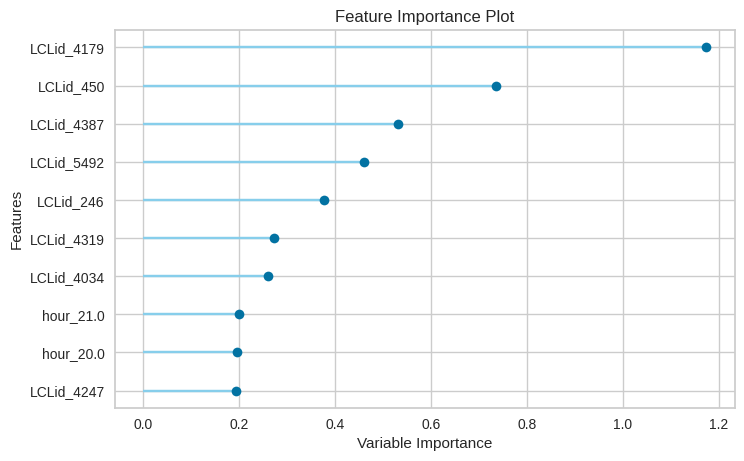

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(ridge_reg, plot='feature')

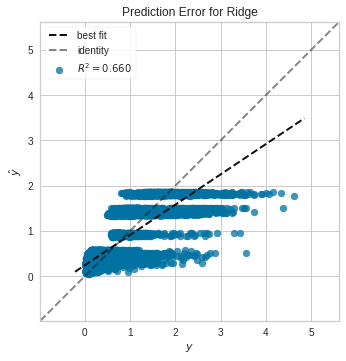

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(ridge_reg, plot = 'error')